# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#adding country
country = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#set up DF for response 

city_weatherDF = pd.DataFrame({'City': cities, 'Cloudiness' : "", 'Date': "", 'Humidity' : "", 'Lat' : "",
                              'Lng' : "", 'Max Temp' : "", 'Windspeed': ""})

#variables for response
record_number = 1
set_number = 1

#Setting Base URL for Call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q=' 


#API Call 
print('''
---------------------------
Beginning Data Retrieval
---------------------------''')

for index, row in city_weatherDF.iterrows():
    #Query Url
    weather_query = base_url + row['City'] + '&APPID=' + weather_api_key
    
# #Response Call
    response = requests.get(weather_query).json()
    
    #Exception error for City Not Found .. 
    try: 
        print(f'Processing Weather Data for Record {record_number} of Set {set_number} | {response["name"]}')
        
        #Input data into the dataframe
        city_weatherDF.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weatherDF.loc[index, 'Date'] = response['dt']
        city_weatherDF.loc[index, 'Humidity'] = response['main']['humidity']
        city_weatherDF.loc[index, 'Lat'] = response['coord']['lat']
        city_weatherDF.loc[index, 'Lng'] = response['coord']['lon']
        city_weatherDF.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weatherDF.loc[index, 'Windspeed'] = response['wind']['speed']
        city_weatherDF.loc[index, 'Country'] = response['sys']['country']
        
        #Increase the record count
        record_number += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
        
    #API Limit
    if record_number == 101:
        set_number += 1
        record_number = 1
        time.sleep(15)

        print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')
        


---------------------------
Beginning Data Retrieval
---------------------------
Processing Weather Data for Record 1 of Set 1 | Kruisfontein
Processing Weather Data for Record 2 of Set 1 | Bilma
Processing Weather Data for Record 3 of Set 1 | Airai
Processing Weather Data for Record 4 of Set 1 | Ajdabiya
Processing Weather Data for Record 5 of Set 1 | Bredasdorp
Processing Weather Data for Record 6 of Set 1 | Avarua
Processing Weather Data for Record 7 of Set 1 | Tiruchchendur
Processing Weather Data for Record 8 of Set 1 | Coquimbo
Processing Weather Data for Record 9 of Set 1 | Mataura
Processing Weather Data for Record 10 of Set 1 | Tarauacá
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 11 of Set 1 | Pemberton
Processing Weather Data for Record 12 of Set 1 | Rikitea
Processing Weather Data for Record 13 of Set 1 | Dikson
Processing Weather Data for Record 14 of Set 1 | Ternate
Processing Weather Data for Record 15 

Processing Weather Data for Record 31 of Set 2 | Clyde River
Processing Weather Data for Record 32 of Set 2 | Sinnamary
Processing Weather Data for Record 33 of Set 2 | North Bend
Processing Weather Data for Record 34 of Set 2 | Butaritari
Processing Weather Data for Record 35 of Set 2 | Esperance
Processing Weather Data for Record 36 of Set 2 | Bystryy Istok
Processing Weather Data for Record 37 of Set 2 | Kovdor
Processing Weather Data for Record 38 of Set 2 | Port Hardy
Processing Weather Data for Record 39 of Set 2 | Ituaçu
Processing Weather Data for Record 40 of Set 2 | Richards Bay
Processing Weather Data for Record 41 of Set 2 | Vanimo
Processing Weather Data for Record 42 of Set 2 | Rio Grande
City not found....Skipping............
Processing Weather Data for Record 43 of Set 2 | Russell
Processing Weather Data for Record 44 of Set 2 | Port Elizabeth
Processing Weather Data for Record 45 of Set 2 | Flagstaff
Processing Weather Data for Record 46 of Set 2 | Pisco
Processing Wea

Processing Weather Data for Record 62 of Set 3 | Mendi
Processing Weather Data for Record 63 of Set 3 | Mossamedes
Processing Weather Data for Record 64 of Set 3 | Bariloche
Processing Weather Data for Record 65 of Set 3 | Haines Junction
Processing Weather Data for Record 66 of Set 3 | Vila Franca do Campo
Processing Weather Data for Record 67 of Set 3 | Hay River
Processing Weather Data for Record 68 of Set 3 | Juneau
Processing Weather Data for Record 69 of Set 3 | Vieques
Processing Weather Data for Record 70 of Set 3 | Tucumã
Processing Weather Data for Record 71 of Set 3 | Sidi Ali
Processing Weather Data for Record 72 of Set 3 | Kumul
Processing Weather Data for Record 73 of Set 3 | Privolnaya
Processing Weather Data for Record 74 of Set 3 | La Reforma
Processing Weather Data for Record 75 of Set 3 | Bondo
Processing Weather Data for Record 76 of Set 3 | Wahlstedt
Processing Weather Data for Record 77 of Set 3 | Krasnosel'kup
Processing Weather Data for Record 78 of Set 3 | Voyv

Processing Weather Data for Record 93 of Set 4 | Mayumba
Processing Weather Data for Record 94 of Set 4 | Oranjemund
Processing Weather Data for Record 95 of Set 4 | Paka
Processing Weather Data for Record 96 of Set 4 | Saint Anthony
Processing Weather Data for Record 97 of Set 4 | Kavaratti
Processing Weather Data for Record 98 of Set 4 | Chittarkonda
Processing Weather Data for Record 99 of Set 4 | Kajaani
Processing Weather Data for Record 100 of Set 4 | High Rock

-----------------------------
Data Retrieval Complete
-----------------------------
Processing Weather Data for Record 1 of Set 5 | Troitsko-Pechorsk
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 2 of Set 5 | Conceição do Araguaia
Processing Weather Data for Record 3 of Set 5 | Mehamn
Processing Weather Data for Record 4 of Set 5 | Bloomfield
Processing Weather Data for Record 5 of Set 5 | Port Blair
Processing Weather Data for Record 6 of Set 5 | Tres Arr

Processing Weather Data for Record 23 of Set 6 | Lufilufi
Processing Weather Data for Record 24 of Set 6 | Waitati
Processing Weather Data for Record 25 of Set 6 | Coahuayana Viejo
Processing Weather Data for Record 26 of Set 6 | Narón
Processing Weather Data for Record 27 of Set 6 | Vila
Processing Weather Data for Record 28 of Set 6 | Tura
Processing Weather Data for Record 29 of Set 6 | Pochutla
Processing Weather Data for Record 30 of Set 6 | Aberdeen
Processing Weather Data for Record 31 of Set 6 | Tabou
Processing Weather Data for Record 32 of Set 6 | Yerbogachën
Processing Weather Data for Record 33 of Set 6 | Grindavik
Processing Weather Data for Record 34 of Set 6 | Broken Hill
Processing Weather Data for Record 35 of Set 6 | Dubovskoye
Processing Weather Data for Record 36 of Set 6 | Sydney
Processing Weather Data for Record 37 of Set 6 | Balotra
Processing Weather Data for Record 38 of Set 6 | Snezhnogorsk
Processing Weather Data for Record 39 of Set 6 | Pimentel
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#DF set up and clean up
city_weatherDF['Max Temp']  = city_weatherDF['Max Temp'].replace("", np.nan)
city_weatherDF = city_weatherDF.dropna()

#exporting
city_weatherDF.to_csv("../output_data/CityWeather.csv", index=False, header=True)

city_weatherDF.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed,Country
0,kruisfontein,0,1610981378,56,-34.0033,24.7314,78.01,8.99,ZA
1,bilma,99,1610981374,17,18.6853,12.9164,77.90,4.94,NE
2,airai,100,1610981374,100,-8.9266,125.409,61.81,1.28,TL
3,ajdabiya,80,1610981597,61,30.7554,20.2263,60.39,20.76,LY
4,bredasdorp,0,1610981419,57,-34.5322,20.0403,75.20,19.57,ZA


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#No cities over 100%

In [15]:
#  Get the indices of cities that have humidity over 100%.
#No Cities over 100%

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

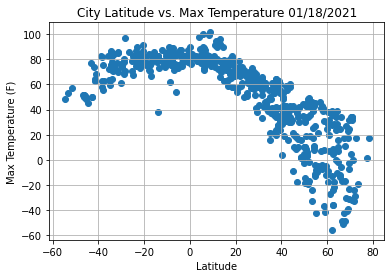

In [17]:
plt.scatter(city_weatherDF['Lat'], city_weatherDF['Max Temp'], marker = "o")

#Plot details
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#saving
plt.savefig("../output_data/Lat vs. Max Temp.png")

plt.show()

##This is analyzing the max temperature of each city amongst the latitudes in which they are located. You would hope to find the largest temperatures near 0 latitude.

## Latitude vs. Humidity Plot

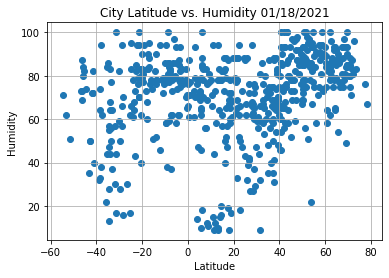

In [18]:
#Plotting
plt.scatter(city_weatherDF['Lat'], city_weatherDF['Humidity'], marker = "o")

#Plot details
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#saving
plt.savefig("../output_data/Lat vs. Humidity.png")

plt.show()

##This is analyzing the Cities latitude against the Humidity %.  As we go north and south of the equator (0 latitude) we can see if there are any correlations with humidity %.

## Latitude vs. Cloudiness Plot

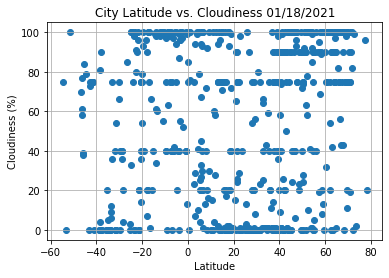

In [19]:
#Plotting
plt.scatter(city_weatherDF['Lat'], city_weatherDF['Cloudiness'], marker = "o")

#Plot details
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#saving
plt.savefig("../output_data/Lat vs. Cloudiness.png")

plt.show()

##This is plotting the cloudiness of each city against the cities latitude.  We can see if latitude effects how cloudiness levels.

## Latitude vs. Wind Speed Plot

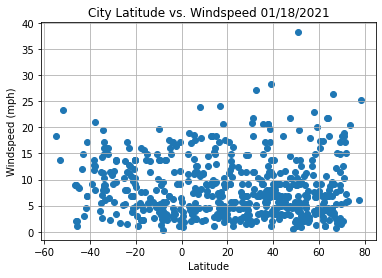

In [20]:
#Plotting
plt.scatter(city_weatherDF['Lat'], city_weatherDF['Windspeed'], marker = "o")

#Plot details
plt.title(f'City Latitude vs. Windspeed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#saving
plt.savefig("../output_data/Lat vs. Windspeed.png")

plt.show()

##This is plotting windspeed against latitdue.  We can see if windspeed would be affected based on a cities latitude. 

## Linear Regression

In [21]:
#Northern Hemisphere locations
north = city_weatherDF.loc[city_weatherDF["Lat"].astype(float) >= 0.0]
north.reset_index(inplace=True)

#Southern Hemisphere Locations

south = city_weatherDF.loc[city_weatherDF["Lat"].astype(float) < 0.0]
south.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.44x + 95.45
The r-squared is: -0.8491686218693599
The regression displays a negative correlation.
In the nothern hemisphere, as latitude increases = temperature decreases.


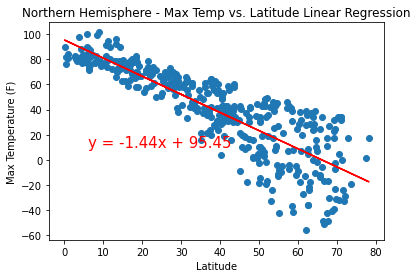

In [22]:
x_values = pd.to_numeric(north['Lat']).astype(float)
y_values = pd.to_numeric(north['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as latitude increases = temperature decreases.")
plt.savefig("../output_data/Northern Hemisphere Lat vs. Max Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.44x + 85.14
The r-squared is: 0.5673007946804979
The regression displays a positive correlation.
Southern hemisphere, as latitude approaches 0 = temperature increases.


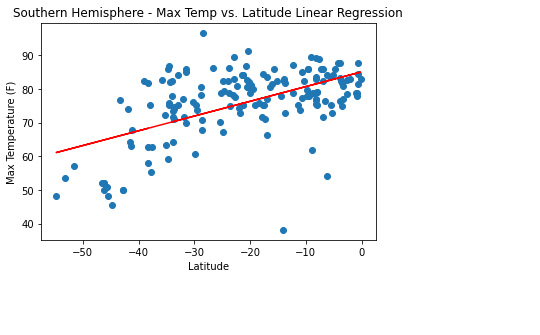

In [23]:
x_values = pd.to_numeric(south['Lat']).astype(float)
y_values = pd.to_numeric(south['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("Southern hemisphere, as latitude approaches 0 = temperature increases.")
plt.savefig("../output_data/Southern Hemisphere Lat vs. Max Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.42x + 55.91
The r-squared is: 0.42029894676316437
The regression displays a somehwat poor positive correlation.
In the nothern hemisphere, as latitude as latitiude increases there is a somewhat positive correlation with an increase in humidity 


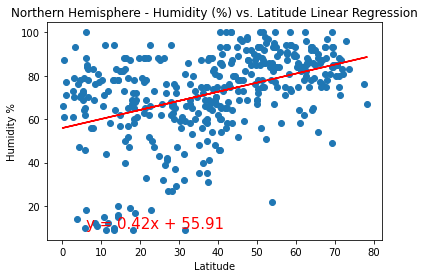

In [24]:
x_values = pd.to_numeric(north['Lat']).astype(float)
y_values = pd.to_numeric(north['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a somehwat poor positive correlation.")
print("In the nothern hemisphere, as latitude as latitiude increases there is a somewhat positive correlation with an increase in humidity ")
plt.savefig("../output_data/Northern Hemisphere Lat vs. Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.48x + 79.86
The r-squared is: 0.34684614641963485
The regression is very poor.
There is a very poor positive correlation with humidity as latitude approaches 0 in the Southern Hemisphere.


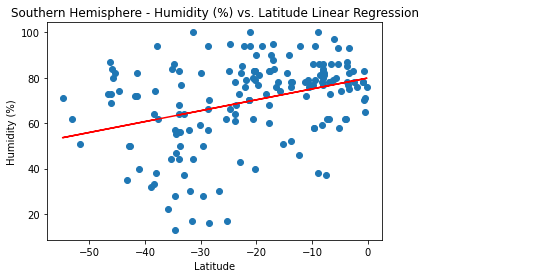

In [25]:
x_values = pd.to_numeric(south['Lat']).astype(float)
y_values = pd.to_numeric(south['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression is very poor.")
print("There is a very poor positive correlation with humidity as latitude approaches 0 in the Southern Hemisphere.")
plt.savefig("../output_data/Southern Hemisphere Lat vs. Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.53x + 31.08
The r-squared is: 0.26489615105125697
The regression displays a poor correlation.
In the nothern hemisphere, as latitude increases there is a poor positive correlation with an increase in cloudiness


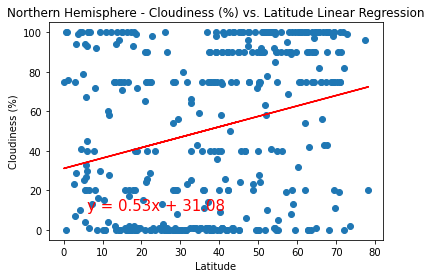

In [26]:
x_values = pd.to_numeric(north['Lat']).astype(float)
y_values = pd.to_numeric(north['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a poor correlation.")
print("In the nothern hemisphere, as latitude increases there is a poor positive correlation with an increase in cloudiness")
plt.savefig("../output_data/Northern Hemisphere Lat vs. Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.05x + 77.12
The r-squared is: 0.36957421131987417
The regression displays a poor correlation
Southern hemisphere, as latitude approaches 0 cloudiness has a poor positive correlation.


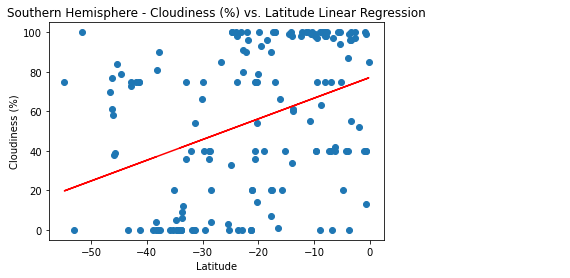

In [27]:
x_values = pd.to_numeric(south['Lat']).astype(float)
y_values = pd.to_numeric(south['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a poor correlation")
print("Southern hemisphere, as latitude approaches 0 cloudiness has a poor positive correlation.")
plt.savefig("../output_data/Southern Hemisphere Lat vs. Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.0x + 8.44
The r-squared is: -0.0102445319979722
The regression displays a poor correlation.
In the nothern hemisphere, there is a poor correlation with Wyuindspeed vs. Latitude


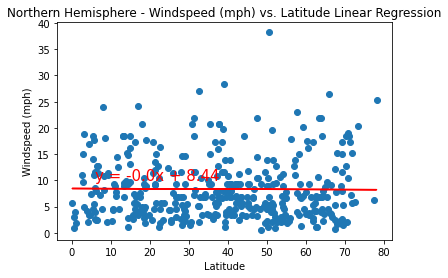

In [28]:
x_values = pd.to_numeric(north['Lat']).astype(float)
y_values = pd.to_numeric(north['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Northern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a poor correlation.")
print("In the nothern hemisphere, there is a poor correlation with Wyuindspeed vs. Latitude")
plt.savefig("../output_data/Northern Hemisphere Lat vs. Windspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.08x + 7.0
The r-squared is: -0.22697700541902294
The regression displays a poor correlation.
Southern hemisphere, there is a poor correlation with windspeed and latitude.


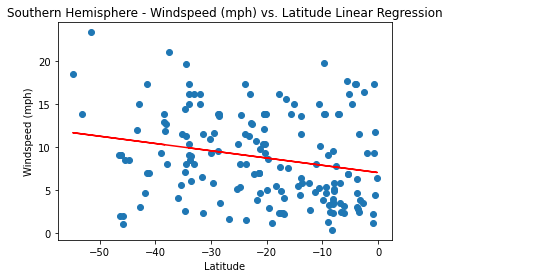

In [29]:
x_values = pd.to_numeric(south['Lat']).astype(float)
y_values = pd.to_numeric(south['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Southern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a poor correlation.")
print("Southern hemisphere, there is a poor correlation with windspeed and latitude.")
plt.savefig("../output_data/Southern Hemisphere Lat vs. Windspeed.png")
plt.show()